# Data Preprocessing

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import json
import librosa
import soundfile as sf
import random
import pandas as pd
from pydub import AudioSegment
from tqdm import tqdm

In [5]:
DATASET_NAME = 'dataset'
AUDIO_SOURCE = '/home/giacomoschiavo/Tovanella'

In [6]:
DATASET_PATH = f'/home/giacomoschiavo/segments/{DATASET_NAME}'
TRAIN_PATH = f'/home/giacomoschiavo/segments/{DATASET_NAME}/train'
VALID_PATH = f'/home/giacomoschiavo/segments/{DATASET_NAME}/valid'
TEST_PATH = f'/home/giacomoschiavo/segments/{DATASET_NAME}/test'

In [7]:
species_list = set(os.listdir(TEST_PATH)).intersection(set(os.listdir(TRAIN_PATH)))
if 'Engine_Engine' in species_list:
    species_list.remove('Engine_Engine')
if 'Cuculus canorus_Common Cuckoo' in species_list:
    species_list.remove('Cuculus canorus_Common Cuckoo')

In [8]:
def print_dataset_count_table(dataset_path):
    train_folder = f"{dataset_path}/train"
    valid_folder = f"{dataset_path}/valid"
    test_folder = f"{dataset_path}/test"

    dataset_count = {}
    for species in os.listdir(test_folder):
        if species not in species_list:
            continue
        dataset_count[species] = {
            "train": len(os.listdir(os.path.join(train_folder, species))) if os.path.exists(os.path.join(train_folder, species)) else 0,
            "valid": len(os.listdir(os.path.join(valid_folder, species))) if os.path.exists(os.path.join(valid_folder, species)) else 0,
            "test": len(os.listdir(os.path.join(test_folder, species))) if os.path.exists(os.path.join(test_folder, species)) else 0
        }

    dataset_species_count_df = pd.DataFrame.from_dict(dataset_count, orient='index')
    dataset_species_count_df.index.name = 'Species'
    return dataset_species_count_df.sort_values(by=["train"], ascending=False)


In [9]:
print_dataset_count_table(DATASET_PATH)

,train,valid,test
Species,,,
Fringilla coelebs_Common Chaffinch,9669,133,1666
None,5000,486,4683
Sylvia atricapilla_Eurasian Blackcap,3198,715,540
Regulus ignicapilla_Common Firecrest,3022,80,599
Phylloscopus collybita_Common Chiffchaff,2189,158,674
Erithacus rubecula_European Robin,1701,172,556
Troglodytes troglodytes_Eurasian Wren,1215,68,278
Periparus ater_Coal Tit,997,94,232
Regulus regulus_Goldcrest,916,175,168


In [15]:
print_dataset_count_table(DATASET_PATH)

,train,valid,test
Species,,,
Fringilla coelebs_Common Chaffinch,9669,133,1666
None,5000,486,4683
Sylvia atricapilla_Eurasian Blackcap,3198,715,540
Regulus ignicapilla_Common Firecrest,3022,80,599
Phylloscopus collybita_Common Chiffchaff,2189,158,674
Erithacus rubecula_European Robin,1701,172,556
Troglodytes troglodytes_Eurasian Wren,1215,68,278
Periparus ater_Coal Tit,997,94,232
Regulus regulus_Goldcrest,916,175,168


# Sample Removal

In [8]:
train_folder = f"{DATASET_PATH}/train"
train_removed = f"{DATASET_PATH}/train_removed"

In [10]:
os.makedirs(train_removed, exist_ok=True)
for species in os.listdir(train_removed):
    all_audio = os.listdir(os.path.join(train_removed, species))
    for audio in all_audio:
        os.rename(
            os.path.join(train_removed, species, audio),
            os.path.join(train_folder, species, audio)
        )

In [14]:

for species in os.listdir(train_folder):
    if species != 'None':
        continue
    all_audio = os.listdir(os.path.join(train_folder, species))
    if len(all_audio) <= 100:
        continue
    random.shuffle(all_audio)
    os.makedirs(os.path.join(train_removed, species), exist_ok=True)
    chosen_audio = all_audio[:5000]
    for audio in all_audio:
        if audio in chosen_audio:
            continue
        print(species, audio)
        os.rename(
            os.path.join(train_folder, species, audio),
            os.path.join(train_removed, species, audio)
        )

None 20190621_160000_385_5.wav
None 20200216_110000_282_0.wav
None XC696997_0_52_5.wav
None 20190608_190000_408_0.wav
None 20200217_120000_198_0.wav
None 20200215_070000_372_0.wav
None 20190603_160000_364_5.wav
None 20200217_060000_226_5.wav
None 20190612_020000_277_5.wav
None 20200215_080000_178_5.wav
None 20200217_070000_480_0.wav
None 20200215_100000_523_5.wav
None 20190621_020000_217_5.wav
None 20200216_060000_531_0.wav
None 20200217_000000_132_0.wav
None 20200215_080000_570_0.wav
None 20200217_120000_532_5.wav
None 20200217_000000_411_0.wav
None 20200216_070000_286_5.wav
None 20190603_190000_589_5.wav
None 20200216_060000_550_5.wav
None 20190607_120000_342_0.wav
None 20200216_090000_84_0.wav
None 20190608_090000_60_0.wav
None 20200217_000000_384_0.wav
None 20200217_160000_430_5.wav
None 20200215_110000_283_5.wav
None 20200216_110000_363_0.wav
None 20190608_160000_414_0.wav
None 20190607_120000_381_0.wav
None 20190621_010000_484_5.wav
None 20190607_080000_544_5.wav
None 20190607_11

# WABAD Integration

In [8]:
train_folder = f"{DATASET_PATH}/train"
test_folder = f"{DATASET_PATH}/test"
WABAD_FOLDER = "/home/giacomoschiavo/WABAD/segments"

dataset_species_count = {}
for species in os.listdir(test_folder):
    dataset_species_count[species] = {
        "train": len(os.listdir(os.path.join(train_folder, species))),
        "test": len(os.listdir(os.path.join(test_folder, species))),
        "wabad": len(os.listdir(os.path.join(WABAD_FOLDER, species))) if os.path.exists(os.path.join(WABAD_FOLDER, species)) else 0
    }

wabad_species = os.listdir(WABAD_FOLDER)
dataset_species_count_df = pd.DataFrame.from_dict(dataset_species_count, orient='index')
dataset_species_count_df.index.name = 'Species'
dataset_species_count_df = dataset_species_count_df.reset_index() # Make 'Species' a regular column

dataset_species_count_df["In WABAD?"] = dataset_species_count_df["Species"].apply(lambda x: x in wabad_species)
dataset_species_count_df.sort_values(by="train", ascending=False)

,Species,train,test,wabad,In WABAD?
9,None,14727,4683,18110,True
20,Fringilla coelebs_Common Chaffinch,9669,1370,0,False
15,Turdus merula_Eurasian Blackbird,7392,315,301,True
2,Periparus ater_Coal Tit,4549,212,0,True
18,Sylvia atricapilla_Eurasian Blackcap,3913,493,0,False
5,Anthus trivialis_Tree Pipit,3300,160,0,True
4,Regulus regulus_Goldcrest,3276,136,0,True
17,Regulus ignicapilla_Common Firecrest,3022,575,0,False
12,Phylloscopus collybita_Common Chiffchaff,2189,674,0,False
11,Certhia familiaris_Eurasian Treecreeper,2086,92,0,True


In [9]:
import random
WABAD_FOLDER = "/home/giacomoschiavo/WABAD/old_segments"

# MOVE WABAD TO TRAINING FOLDER
train_species = os.listdir(TRAIN_PATH)
for species in os.listdir(WABAD_FOLDER):
    if species not in train_species or species == "None":
        print(species)
        continue
    # select a maximum of 1000 segments per speciess
    all_audios = os.listdir(os.path.join(WABAD_FOLDER, species))[:4000]
    selected_audios = all_audios
        # selected_audios = random.sample(all_audios, NUM_SEGMENTS)
    for audio in selected_audios:
        os.rename(
            os.path.join(WABAD_FOLDER, species, audio),
            os.path.join(TRAIN_PATH, species, audio)
        )

## Undo WABAD

In [5]:
# move back
target_path = "/home/giacomoschiavo/WABAD/segments/"
os.makedirs(target_path, exist_ok=True)
for species in os.listdir(TRAIN_PATH):
    for audio in os.listdir(os.path.join(TRAIN_PATH, species)):
        if len(audio.split("_")[0]) <= 6:
            os.makedirs(os.path.join(target_path, species), exist_ok=True)
            os.rename(
                os.path.join(TRAIN_PATH, species, audio),
                os.path.join(target_path, species, audio)
            )

In [12]:
dataset_species_count_wabad = {}
for species in os.listdir(test_folder):
    dataset_species_count_wabad[species] = {
        "train": len(os.listdir(os.path.join(train_folder, species))),
        "test": len(os.listdir(os.path.join(test_folder, species)))
    }
dataset_species_count_df = pd.DataFrame.from_dict(dataset_species_count_wabad, orient='index')
dataset_species_count_df.index.name = 'Species'
dataset_species_count_df.sort_values(by="train", ascending=False)


NameError: name 'test_folder' is not defined

# Augmentation

In [13]:
REMOVED_PATH = f'{DATASET_PATH}/augm_removed'
species_to_augment = ['Coccothraustes coccothraustes_Hawfinch',
 'Lophophanes cristatus_Crested Tit',
 'Loxia curvirostra_Common Crossbill',
 'Parus major_Great Tit']

In [12]:
# MOVE ALREADY CALCULATED AUGMENTATIONS
# if os.path.exists(REMOVED_PATH):
#     for species in species_to_augment:
#         for audio in os.listdir(os.path.join(REMOVED_PATH, species)):
#             if "gain" in audio:
                # os.rename(
                #     os.path.join(REMOVED_PATH, species, audio),
                #     os.path.join(TRAIN_PATH, species, audio)
                # )

SyntaxError: incomplete input (2439560956.py, line 10)

In [14]:
import librosa
import soundfile as sf
from audiomentations import Compose, PitchShift, TimeStretch, AddBackgroundNoise, Gain

In [15]:
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def save_audio(file_path, audio, sr):
    sf.write(file_path, audio, sr)

In [16]:

bg_noise_path = f"{DATASET_PATH}/train/None"
bg_noises = os.listdir(bg_noise_path)
augmentations = {
    "psA": Compose([PitchShift(min_semitones=-3, max_semitones=-1, p=0.75)]),
    "psB": Compose([PitchShift(min_semitones=1, max_semitones=3, p=0.75)]),
    "ts": Compose([TimeStretch(min_rate=0.9, max_rate=1.1, p=0.75)]),
    "gain": Compose([Gain(min_gain_db=-5, max_gain_db=5, p=0.5)]),
    "bn": Compose([
        AddBackgroundNoise(sounds_path=os.path.join(bg_noise_path, random.choice(bg_noises)), p=0.8),
        Gain(min_gain_db=-5, max_gain_db=5, p=0.5) 
    ]),
}


def apply_augmentations(file_path, output_dir):
    audio, sr = load_audio(file_path)
    
    for aug_name, aug in augmentations.items():
        file_name = os.path.splitext(file_path)[0].split('/')[-1]
        if "aug" in file_name:
            continue
        save_audio_path = f"{output_dir}/{file_name}_aug_{aug_name}.wav"
        if os.path.exists(save_audio_path):
            continue
        if "spec" in save_audio_path:
            augmented_audio, _, _ = aug(audio, sr)
        else:
            augmented_audio = aug(audio, sr)
        save_audio(save_audio_path, augmented_audio, sr)

In [17]:
# pick samples where validation samples == 0
train_folder = f'{DATASET_PATH}/train'
species_to_augment = []
threshold = 200
for species in os.listdir(train_folder):
    if len(species.split("_")) <= 1:
        print(species, "skipped")
        continue
    if len(os.listdir(os.path.join(train_folder, species))) >= threshold:
        continue
    species_to_augment.append(species)

species_to_augment

Aeroplane skipped
Vegetation skipped
None skipped
Wind skipped


['Parus major_Great Tit',
 'Coccothraustes coccothraustes_Hawfinch',
 'Loxia curvirostra_Common Crossbill',
 'Lophophanes cristatus_Crested Tit']

In [18]:
for species in species_to_augment:
    files = os.listdir(os.path.join(train_folder, species))
    print("Augmenting ", species)
    for i in tqdm(range(len(files)), colour="blue"):
        audio = files[i]
        apply_augmentations(os.path.join(train_folder, species, audio), os.path.join(train_folder, species))

Augmenting  Parus major_Great Tit


 15%|█▍        | 16/108 [00:03<00:12,  7.59it/s]/opt/conda/envs/myenv/lib/python3.10/site-packages/audiomentations/core/audio_loading_utils.py:37: UserWarning: /home/giacomoschiavo/segments/dataset/train/None/20190621_150000_292_5.wav had to be resampled from 48000 Hz to 44100 Hz. This hurt execution time.
  warnings.warn(
100%|██████████| 108/108 [00:16<00:00,  6.63it/s]


Augmenting  Coccothraustes coccothraustes_Hawfinch


100%|██████████| 82/82 [00:11<00:00,  7.01it/s]


Augmenting  Loxia curvirostra_Common Crossbill


100%|██████████| 158/158 [00:21<00:00,  7.34it/s]


Augmenting  Lophophanes cristatus_Crested Tit


100%|██████████| 146/146 [00:19<00:00,  7.39it/s]


In [19]:
print_dataset_count_table(DATASET_PATH)

,train,valid,test
Species,,,
Fringilla coelebs_Common Chaffinch,9669,133,1666
None,5000,486,4683
Sylvia atricapilla_Eurasian Blackcap,3198,715,540
Regulus ignicapilla_Common Firecrest,3022,80,599
Phylloscopus collybita_Common Chiffchaff,2189,158,674
Erithacus rubecula_European Robin,1701,172,556
Troglodytes troglodytes_Eurasian Wren,1215,68,278
Periparus ater_Coal Tit,997,94,232
Loxia curvirostra_Common Crossbill,948,54,46


## Augmentation removal

In [7]:
train_path = f"{DATASET_PATH}/train"
target_path = f"{DATASET_PATH}/augm_removed"
os.makedirs(target_path, exist_ok=True)
for species in os.listdir(train_path):
    for audio in os.listdir(os.path.join(train_path, species)):
        os.makedirs(os.path.join(target_path, species), exist_ok=True)
        if "aug" in audio:
            print(audio)
            os.rename(
                os.path.join(train_path, species, audio),
                os.path.join(target_path, species, audio),
            )

XC901642_0_66_0_aug_psA.wav
XC792232_0_79_5_aug_bn.wav
XC901642_0_295_5_aug_gain.wav
XC901642_0_282_0_aug_psB.wav
XC901642_0_69_0_aug_gain.wav
XC901642_0_64_5_aug_ts.wav
XC901642_0_69_0_aug_bn.wav
XC904408_0_87_0_aug_ts.wav
XC792232_0_87_0_aug_gain.wav
XC792232_0_79_5_aug_psA.wav
XC792232_0_10_5_aug_psA.wav
XC904408_0_88_5_aug_gain.wav
XC971285_0_0_0_aug_gain.wav
XC792232_0_67_5_aug_gain.wav
XC901642_0_292_5_aug_gain.wav
XC792232_0_33_0_aug_ts.wav
XC475105_0_40_5_aug_psB.wav
XC792232_0_87_0_aug_bn.wav
XC901642_0_270_0_aug_bn.wav
XC475105_0_34_5_aug_bn.wav
XC792232_0_99_0_aug_ts.wav
XC792232_0_49_5_aug_gain.wav
XC901642_0_273_0_aug_psA.wav
XC904408_0_114_0_aug_psA.wav
XC904408_0_93_0_aug_psA.wav
XC904408_0_118_5_aug_psB.wav
XC475105_0_0_0_aug_bn.wav
XC904408_0_87_0_aug_psB.wav
XC792232_0_69_0_aug_bn.wav
XC904408_0_91_5_aug_bn.wav
XC901642_0_268_5_aug_psB.wav
XC901642_0_66_0_aug_psB.wav
XC475105_0_37_5_aug_bn.wav
XC792232_0_66_0_aug_ts.wav
XC901642_0_79_5_aug_gain.wav
XC792232_0_139_5_au

In [12]:
print_dataset_count_table(DATASET_PATH)

,train,valid,test
Species,,,
None,13374,486,4683
Fringilla coelebs_Common Chaffinch,7901,429,1370
Phylloscopus collybita_Common Chiffchaff,2014,158,674
Regulus ignicapilla_Common Firecrest,2777,104,575
Erithacus rubecula_European Robin,1554,172,556
Sylvia atricapilla_Eurasian Blackcap,3742,47,493
Turdus merula_Eurasian Blackbird,658,72,315
Periparus ater_Coal Tit,883,94,212
Troglodytes troglodytes_Eurasian Wren,1159,138,208


# SNR Filter

In [3]:
def calculate_snr(audio_path):
    """
    Calculates the Signal-to-Noise Ratio (SNR) of an audio file with respect to a noise segment.

    - audio_path: path to the audio file
    - noise_start, noise_end: time interval in seconds where the noise is isolated
    """
    
    noise_audio = f"{DATASET_PATH}/None/20190603_110000_322_5.wav"
    y_noise, sr_noise = librosa.load(noise_audio, sr=None)
    
    noise_sample = y_noise[:]
    
    y, sr = librosa.load(audio_path, sr=None)
    signal_power = np.mean(y**2)
    noise_power = np.mean(noise_sample**2)
    
    if noise_power == 0:
        return np.inf
    
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db

In [6]:
species_to_reduce = []
threshold = 200
train_folder = f'{DATASET_PATH}/train'
for species in os.listdir(train_folder):
    if len(species.split("_")) <= 1:
        continue
    if len(os.listdir(os.path.join(train_folder, species))) <= threshold:
        continue
    species_to_reduce.append(species)

In [8]:
info = {}
for species in species_to_reduce:
    info[species] = {}
    for audio_path in os.listdir(os.path.join(train_folder, species)):
        full_audio_path = os.path.join(train_folder, species, audio_path)
        snr = calculate_snr(full_audio_path)
        info[species][audio_path] = snr

In [9]:
with open(f"utils/{DATASET_NAME}/audio_snr_info.json", "w") as f:
    json.dump(info, f)

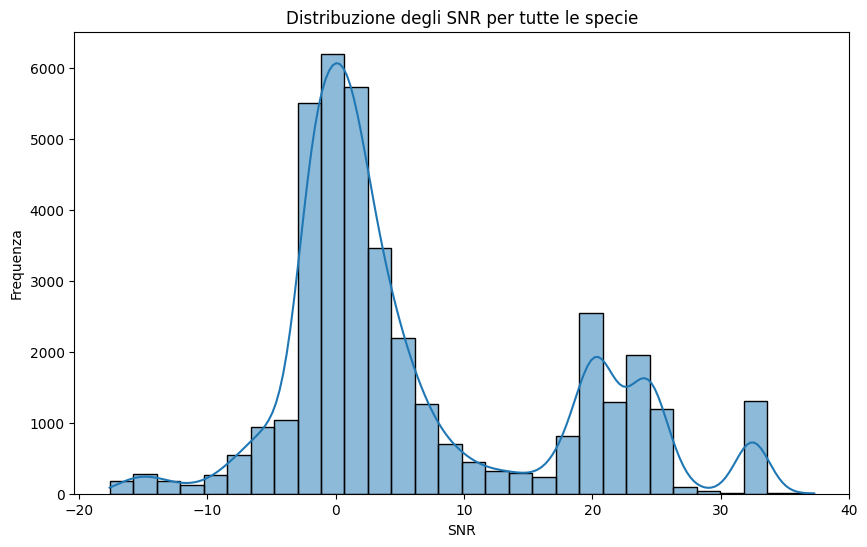

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Raccolta di tutti gli SNR in una lista unica
all_snr_values = []
for specie in info:
    all_snr_values.extend(info[specie].values())

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
sns.histplot(all_snr_values, bins=30, kde=True)

# Titoli e labels
plt.title("Distribuzione degli SNR per tutte le specie")
plt.xlabel("SNR")
plt.ylabel("Frequenza")

# Mostra il grafico
plt.show()


In [15]:
# Initialize the dictionary to store the results
top_800_per_specie = {}

# Iterate through each species in the 'info' dictionary
for species, files in info.items():
    # Filter files with SNR less than 20 dB
    snr_below_20 = {file: snr for file, snr in files.items() if snr < 20}
    
    # Sort the filtered files by SNR in descending order
    sorted_files = sorted(snr_below_20.items(), key=lambda item: item[1], reverse=True)
    
    # Select the first 800 files from the sorted list
    best_800 = [file for file, snr in sorted_files[:800]]
    
    # Add the species and the list of the best 800 files to the results dictionary
    top_800_per_specie[species] = best_800

# The 'top_800_per_specie' dictionary now contains species as keys
# and lists of the best 800 audio files with SNR less than 20 dB as values

In [22]:
target_path = f"{DATASET_PATH}/snr_removed"
train_path = f"{DATASET_PATH}/train"
os.makedirs(target_path, exist_ok=True)
for species in os.listdir(train_path):
    if species not in species_to_reduce:
        continue
    for audio in os.listdir(os.path.join(train_path, species)):
        os.makedirs(os.path.join(target_path, species), exist_ok=True)
        if audio not in top_800_per_specie[species]:
            os.rename(
                os.path.join(train_path, species, audio),
                os.path.join(target_path, species, audio)
            )


In [22]:
print_dataset_count_table()

,train,valid,test
Species,,,
Fringilla coelebs_Common Chaffinch,5402,600,2040
Turdus philomelos_Song Thrush,3886,431,58
Sylvia atricapilla_Eurasian Blackcap,2725,302,715
Regulus ignicapilla_Common Firecrest,2500,277,417
Erithacus rubecula_European Robin,1247,138,69
Troglodytes troglodytes_Eurasian Wren,1044,115,52
Regulus regulus_Goldcrest,495,55,106
Periparus ater_Coal Tit,286,31,116
Muscicapa striata_Spotted Flycatcher,231,25,64


### Undo SNR removal

In [4]:
import os
snr_folder_path = f"{DATASET_PATH}/snr_removed"
train_path = f"{DATASET_PATH}/train"
for species in os.listdir(snr_folder_path):
    for audio in os.listdir(os.path.join(snr_folder_path, species)):
        os.rename(
            os.path.join(snr_folder_path, species, audio),
            os.path.join(train_path, species, audio)
        )


### Undo WABAD from Train and Valid

In [ ]:
train_path = f"{DATASET_PATH}/train"
# valid_path = f"{DATASET_PATH}/valid"
wabad_segments = "E:/Giacomo/Tovanella/wabad_segments"

for species in os.listdir(train_path):
    for audio in os.listdir(os.path.join(train_path, species)):
        is_wabad = len(audio.split("_")[0]) != 8
        if is_wabad:
            os.rename(
                os.path.join(train_path, species, audio),
                os.path.join(wabad_segments, species, audio)
            )

### Undo Validation

In [18]:
train_path = f"{DATASET_PATH}/train"
valid_path = f"{DATASET_PATH}/valid"

for species in os.listdir(valid_path):
    for audio in os.listdir(os.path.join(valid_path, species)):
        os.rename(
            os.path.join(valid_path, species, audio),
            os.path.join(train_path, species, audio)
        )